# LP4 SCOA Assignment 2

[[-3.19469798 -2.92115505 -2.40080482  3.87383117 -1.89804063 -3.92496919]
 [-2.67377958  2.33601099 -1.43703188  2.10998131  2.5440723   2.32984187]
 [-2.2340461   1.85347022 -1.94363033 -0.33944834  1.13030187 -1.32858482]
 [ 2.51613795 -1.58653815  2.10472517 -2.21169396 -2.25333443 -3.01453236]
 [ 3.46985656  0.93370634 -1.7802868   3.93864135 -0.06637794 -0.25054559]
 [-2.47000117  2.52053559  2.31106751  1.29519818 -2.28136686  0.06310585]
 [-0.5645227  -0.11337123  2.05108893 -0.75396778  1.66393224 -0.05727277]
 [ 0.60291341 -1.24988793 -3.38411135 -0.33397499 -0.10390453 -0.30771446]]
Best solution :  [[[   2.51613795   -1.58653815    2.10472517    3.87383117 -366.88786515
     -3.92496919]]]
Best solution fitness :  [4094.18719386]


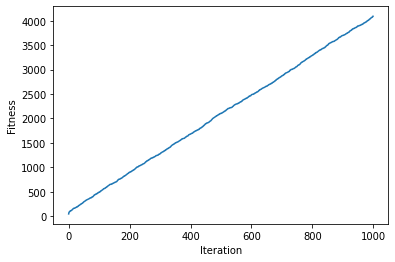

In [ ]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)
    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = numpy.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 4] = offspring_crossover[idx, 4] + random_value
    return offspring_crossover

"""
The y=target is to maximize this equation ASAP:
    y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6
    where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7)
    What are the best values for the 6 weights w1 to w6?
    We are going to use the genetic algorithm for the best possible values after a number of generations.
"""

# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]

# Number of the weights we are looking to optimize.
num_weights = len(equation_inputs)


"""
Genetic algorithm parameters:
    Mating pool size
    Population size
"""

sol_per_pop = 8
num_parents_mating = 4

# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.

#Creating the initial population.
new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
print(new_population)

best_outputs = []

num_generations = 1000

for generation in range(num_generations):
    
    fitness = cal_pop_fitness(equation_inputs, new_population)
    best_outputs.append(numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))
    parents = select_mating_pool(new_population, fitness, num_parents_mating)
    offspring_crossover = crossover(parents, offspring_size=(pop_size[0]-parents.shape[0], num_weights))
    offspring_mutation = mutation(offspring_crossover)
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

# Getting the best solution after iterating finishing all generations.
# At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)

# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

import matplotlib.pyplot
matplotlib.pyplot.plot(best_outputs)
matplotlib.pyplot.xlabel("Iteration")
matplotlib.pyplot.ylabel("Fitness")
matplotlib.pyplot.show()